# Predicting House Sale Prices

We'll work with housing data for the city of Ames, Iowa, United States from 2006 to 2010. You can read more about why the data was collected [here](https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627). You can also read about the different columns in the data [here](https://s3.amazonaws.com/dq-content/307/data_description.txt). The goal of this project is to predict the price of the house given the information about it (area, location etc).

We used a following pipeline of functions that let us quickly iterate on different models.

<img src='https://s3.amazonaws.com/dq-content/240/pipeline.svg' width="250" height="300">

Linear regression model has been used for the predictions and it gave us the accuracy around 0.84 (r2 score) using K fold cross-validation.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from pandas_profiling import ProfileReport

# Set display option for pandas
pd.options.display.max_columns = 99

In [2]:
houses = pd.read_csv('Ameshousing.tsv', delimiter='\t')
houses.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [4]:
# Create a transform function
def transform_featues(df):
    return df

In [5]:
# Check
houses_train = transform_featues(houses)
houses_train

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,Av,GLQ,819.0,Unf,0.0,184.0,1003.0,GasA,TA,Y,SBrkr,1003,0,0,1003,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1984.0,Unf,2.0,588.0,TA,TA,Y,120,0,0,0,0,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1983,1983,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,BLQ,301.0,ALQ,324.0,239.0,864.0,GasA,TA,Y,SBrkr,902,0,0,902,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1983.0,Unf,2.0,484.0,TA,TA,Y,164,0,0,0,0,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,

In [6]:
# Create a feature selection function
def select_features(df):
    return df[['Gr Liv Area', 'SalePrice']]

In [7]:
# Check
select_features(houses_train).columns

Index(['Gr Liv Area', 'SalePrice'], dtype='object')

In [8]:
# Create machine learning model training and testing function
def train_and_test(df):
    train, test = train_test_split(df, test_size=0.2, random_state=1)
    train_x = select_features(train).drop('SalePrice', axis=1)
    train_y = train['SalePrice']
    test_x = select_features(test).drop('SalePrice', axis=1)
    test_y = test['SalePrice']
    lr = LinearRegression()
    lr.fit(train_x, train_y)
    predictions = lr.predict(test_x)
    rmse = np.sqrt(mean_squared_error(test_y, predictions))
    r2 = r2_score(test_y, predictions)
    return rmse, r2

In [9]:
rmse, r2 = train_and_test(houses)
print(f"RMSE for original model is {rmse} and its r2 score is {r2}")

RMSE for original model is 51890.79197927441 and its r2 score is 0.5658359646991824


## Feature engineering

Let's now modify a `transform_features` function so it can clean our data.

In [10]:
houses.isnull().sum().sort_values(ascending=False).head(20)

Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Fireplace Qu      1422
Lot Frontage       490
Garage Cond        159
Garage Finish      159
Garage Yr Blt      159
Garage Qual        159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Qual           80
Bsmt Cond           80
BsmtFin Type 1      80
Mas Vnr Area        23
Mas Vnr Type        23
Bsmt Full Bath       2
Bsmt Half Bath       2
dtype: int64

In [11]:
# The pipeline
def transform_featues(df):
    df_missing = df.isnull().sum()
    df_clean = df[df_missing[df_missing/len(df) < 0.05].index] # Keep only columns with < 5% of missing data
    
    # Dealing with numerical data
    df_num = df_clean.select_dtypes(include=['float64', 'int64'])
    df_num = df_num.fillna(df_num.mean())
    # Drop useless columns
    df_num.drop(['Order', 'PID'], axis = 1, inplace=True) 
    # Create a new feature
    df_num['years_until_remod'] = df_num['Year Remod/Add'] - df_num['Year Built']
    df_num['years_until_sold'] = df_num['Yr Sold'] - df_num['Year Built']
    df_num.drop(['Year Remod/Add', 'Yr Sold', 'Year Built'], axis = 1, inplace=True)
    
    #Dealing with object data
    df_obj = df_clean.select_dtypes(include=['object'])
    missing_objects = df_obj.isnull().sum()
    df_obj = df_obj[missing_objects[missing_objects==0].index] # Keep only columns without missing values
    
    # The final dataset
    df_true = pd.concat([df_num, df_obj], axis=1)
    
    return df_true

def select_features(df):
    return df[['Gr Liv Area', 'SalePrice']]

def train_and_test(df):
    train, test = train_test_split(df, test_size=0.2, random_state=1)
    train_x = train.drop('SalePrice', axis=1)
    train_y = train['SalePrice']
    test_x = test.drop('SalePrice', axis=1)
    test_y = test['SalePrice']
    lr = LinearRegression()
    lr.fit(train_x, train_y)
    predictions = lr.predict(test_x)
    rmse = np.sqrt(mean_squared_error(test_y, predictions))
    r2 = r2_score(test_y, predictions)
    return rmse, r2

transformed_data = transform_featues(houses)
selected_features = select_features(transformed_data)
rmse, r2 = train_and_test(selected_features)
print(f"RMSE for original model is {rmse} and its r2 score is {r2}")

RMSE for original model is 51890.79197927441 and its r2 score is 0.5658359646991824


In [12]:
# Check how clean is the data now
transform_featues(houses).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 61 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MS SubClass        2930 non-null   int64  
 1   Lot Area           2930 non-null   int64  
 2   Overall Qual       2930 non-null   int64  
 3   Overall Cond       2930 non-null   int64  
 4   Mas Vnr Area       2930 non-null   float64
 5   BsmtFin SF 1       2930 non-null   float64
 6   BsmtFin SF 2       2930 non-null   float64
 7   Bsmt Unf SF        2930 non-null   float64
 8   Total Bsmt SF      2930 non-null   float64
 9   1st Flr SF         2930 non-null   int64  
 10  2nd Flr SF         2930 non-null   int64  
 11  Low Qual Fin SF    2930 non-null   int64  
 12  Gr Liv Area        2930 non-null   int64  
 13  Bsmt Full Bath     2930 non-null   float64
 14  Bsmt Half Bath     2930 non-null   float64
 15  Full Bath          2930 non-null   int64  
 16  Half Bath          2930 

## Feature selection

Let's now modify a `select_features` function so it can select the most explainable numerical fetures (for `SalePrice` column) for our prediction model and one-hot categorical ones.

In [13]:
# Choose only numerical columns with high correlation
sorted_corrs = abs(transformed_data.select_dtypes(include=['float64', 'int64']).corr()['SalePrice']).sort_values()
strong_corrs = sorted_corrs[sorted_corrs > 0.3]
selected_features = transformed_data.select_dtypes(include=['float64', 'int64'])[strong_corrs.index]
selected_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open Porch SF     2930 non-null   int64  
 1   Wood Deck SF      2930 non-null   int64  
 2   BsmtFin SF 1      2930 non-null   float64
 3   Fireplaces        2930 non-null   int64  
 4   TotRms AbvGrd     2930 non-null   int64  
 5   Mas Vnr Area      2930 non-null   float64
 6   Full Bath         2930 non-null   int64  
 7   years_until_sold  2930 non-null   int64  
 8   1st Flr SF        2930 non-null   int64  
 9   Total Bsmt SF     2930 non-null   float64
 10  Garage Area       2930 non-null   float64
 11  Garage Cars       2930 non-null   float64
 12  Gr Liv Area       2930 non-null   int64  
 13  Overall Qual      2930 non-null   int64  
 14  SalePrice         2930 non-null   int64  
dtypes: float64(5), int64(10)
memory usage: 343.5 KB


<AxesSubplot:>

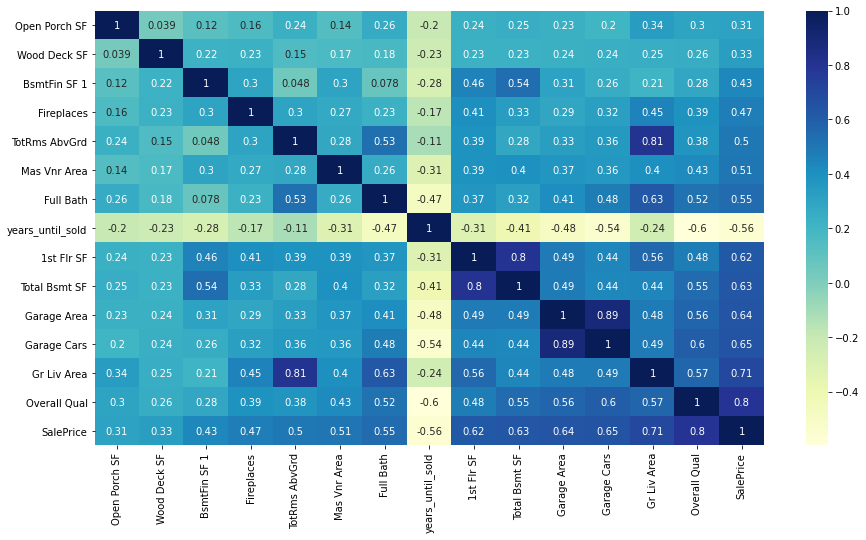

In [14]:
# Plot the correlations
plt.figure(figsize=(15,8))
sns.heatmap(selected_features.corr(), cmap='YlGnBu', annot=True)

In [15]:
# Delete columns with colinearity
selected_features = (selected_features - selected_features.min()) / (selected_features.max() - selected_features.min())
selected_features.var().sort_values()

Total Bsmt SF       0.005199
BsmtFin SF 1        0.006514
1st Flr SF          0.006775
Wood Deck SF        0.007874
Open Porch SF       0.008272
Gr Liv Area         0.009070
SalePrice           0.011585
Mas Vnr Area        0.012433
TotRms AbvGrd       0.014640
Full Bath           0.019109
Garage Area         0.020879
Garage Cars         0.023131
Overall Qual        0.024580
Fireplaces          0.026238
years_until_sold    0.048887
dtype: float64

In [16]:
# Check the model accuracy when using only numerical features
def select_features(df):
    return df.select_dtypes(include=['float64', 'int64'])

transformed_data = transform_featues(houses)
selected_features = select_features(transformed_data)
rmse, r2 = train_and_test(selected_features)
print(f"RMSE for data with all numerical features is {rmse} and its r2 score is {r2}")

RMSE for data with all numerical features is 28461.515544398047 and its r2 score is 0.8693861319611615


In [17]:
# Check the model accuracy when using only numerical features highly correlated with SalePrice column
def select_features(df):
    sorted_corrs = abs(df.select_dtypes(include=['float64', 'int64']).corr()['SalePrice']).sort_values()
    strong_corrs = sorted_corrs[sorted_corrs > 0.3]
    df = df.select_dtypes(include=['float64', 'int64'])[strong_corrs.index]
    return df

transformed_data = transform_featues(houses)
selected_features = select_features(transformed_data)
rmse, r2 = train_and_test(selected_features)
print(f"RMSE for data with all numerical features that are highly correlated with the target value is {rmse} and its r2 score is {r2}")

RMSE for data with all numerical features that are highly correlated with the target value is 30642.497517962027 and its r2 score is 0.848601502208114


In [18]:
# Check the model accuracy when using only numerical features highly correlated with SalePrice column and exluding colinear features
def select_features(df):
    sorted_corrs = abs(df.select_dtypes(include=['float64', 'int64']).corr()['SalePrice']).sort_values()
    strong_corrs = sorted_corrs[sorted_corrs > 0.3]
    df = df.select_dtypes(include=['float64', 'int64'])[strong_corrs.index]
    df.drop(['TotRms AbvGrd', 'Garage Area', '1st Flr SF'], axis=1, inplace=True)
    return df

transformed_data = transform_featues(houses)
selected_features = select_features(transformed_data)
rmse, r2 = train_and_test(selected_features)
print(f"RMSE for data with all numerical features that are highly correlated with the target value excluding colinear features is {rmse} and its r2 score is {r2}")

RMSE for data with all numerical features that are highly correlated with the target value excluding colinear features is 30836.864810337265 and its r2 score is 0.8466747503524884


In [19]:
# Check the model accuracy applying normalization to numerical features
def select_features(df):
    sorted_corrs = abs(df.select_dtypes(include=['float64', 'int64']).corr()['SalePrice']).sort_values()
    strong_corrs = sorted_corrs[sorted_corrs > 0.3]
    df = df.select_dtypes(include=['float64', 'int64'])[strong_corrs.index]
    df.drop(['TotRms AbvGrd', 'Garage Area', '1st Flr SF'], axis=1, inplace=True)
    df_scaled = (df-df.min()) / (df.max()-df.min())
    df_scaled['SalePrice'] = df['SalePrice']
    return df_scaled

transformed_data = transform_featues(houses)
selected_features = select_features(transformed_data)
rmse, r2 = train_and_test(selected_features)
print(f"RMSE for data with scaled values is {rmse} and its r2 score is {r2}")

RMSE for data with scaled values is 30836.86481033724 and its r2 score is 0.8466747503524886


It is quite interesting to see, that normalization does not affect linear regression algorithm. It is the case, since this algorithm is not distance-based (unlike k-neighbors, k-means and SVM) and does not use gradient descent for the fitting function calculation (**in our case closed form solution is used without any regularization**).

Let's now perform the feature engineering with `object` type columns.

In [20]:
# Recall how the transformed data look like
transformed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 61 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MS SubClass        2930 non-null   int64  
 1   Lot Area           2930 non-null   int64  
 2   Overall Qual       2930 non-null   int64  
 3   Overall Cond       2930 non-null   int64  
 4   Mas Vnr Area       2930 non-null   float64
 5   BsmtFin SF 1       2930 non-null   float64
 6   BsmtFin SF 2       2930 non-null   float64
 7   Bsmt Unf SF        2930 non-null   float64
 8   Total Bsmt SF      2930 non-null   float64
 9   1st Flr SF         2930 non-null   int64  
 10  2nd Flr SF         2930 non-null   int64  
 11  Low Qual Fin SF    2930 non-null   int64  
 12  Gr Liv Area        2930 non-null   int64  
 13  Bsmt Full Bath     2930 non-null   float64
 14  Bsmt Half Bath     2930 non-null   float64
 15  Full Bath          2930 non-null   int64  
 16  Half Bath          2930 

Now, we need to perform feature engineering on features with `object` data types. We need to:

* Delete categorical columns, where number of categories is high (10 or more). Otherwise we'll get too much columns from one-hot encoding.
* Delete columns, where 95% or more of a data relates to the one category (these columns does not provide us with a lot of info, it is similar to the low variance numerical feature).
* Convert nominal columns to categorical.
* Get dummies from the columns that have been chosen for the analysis.

In [21]:
transformed_data_objects = transformed_data.select_dtypes(include=['object'])
transformed_data_objects.describe()

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Exter Qual,Exter Cond,Foundation,Heating,Heating QC,Central Air,Kitchen Qual,Functional,Paved Drive,Sale Type,Sale Condition
count,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930
unique,7,2,4,4,3,5,3,28,9,8,5,8,6,8,16,17,4,5,6,6,5,2,5,8,3,10,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,GasA,Ex,Y,TA,Typ,Y,WD,Normal
freq,2273,2918,1859,2633,2927,2140,2789,443,2522,2900,2425,1481,2321,2887,1026,1015,1799,2549,1310,2885,1495,2734,1494,2728,2652,2536,2413


In [22]:
transformed_data_objects.shape

(2930, 27)

In [23]:
# Delete columns with too much categories
for col in transformed_data_objects.columns:
    if len(transformed_data_objects[col].unique()) >= 10:
        transformed_data_objects = transformed_data_objects.drop(col, axis=1)
    
transformed_data_objects.shape

(2930, 23)

In [24]:
for col in transformed_data_objects.columns:
    transformed_data_objects[col] = transformed_data_objects[col].astype('category') # Convert object columns to categorical type
    if len(transformed_data_objects[col].unique()) >= 10:
        transformed_data_objects = transformed_data_objects.drop(col, axis=1) # Delete columns with too much categories
    elif transformed_data_objects[col].value_counts()[0]/len(transformed_data_objects) > 0.95:
        transformed_data_objects = transformed_data_objects.drop(col, axis=1) # Delete columns where 95% or more of a data relates to the one category
    
transformed_data_objects.shape

(2930, 17)

In [25]:
# Check
transformed_data_objects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   MS Zoning       2930 non-null   category
 1   Lot Shape       2930 non-null   category
 2   Land Contour    2930 non-null   category
 3   Lot Config      2930 non-null   category
 4   Condition 1     2930 non-null   category
 5   Bldg Type       2930 non-null   category
 6   House Style     2930 non-null   category
 7   Roof Style      2930 non-null   category
 8   Exter Qual      2930 non-null   category
 9   Exter Cond      2930 non-null   category
 10  Foundation      2930 non-null   category
 11  Heating QC      2930 non-null   category
 12  Central Air     2930 non-null   category
 13  Kitchen Qual    2930 non-null   category
 14  Functional      2930 non-null   category
 15  Paved Drive     2930 non-null   category
 16  Sale Condition  2930 non-null   category
dtypes: category(17

In [26]:
# Perform one-hot encoding for the chosen categorical columns
for col in transformed_data_objects.columns:
    dummies = pd.get_dummies(transformed_data_objects[col])
    transformed_data_objects = pd.concat([transformed_data_objects, dummies], axis=1)
    del transformed_data_objects[col]

# Check
transformed_data_objects.shape

(2930, 92)

In [27]:
# Updating the pipeline
def select_features(df, corr_threshold, num_categ): # Correlation threshold for numerical features and max. number of categories for object features
    # Handle numerical features
    sorted_corrs = abs(df.select_dtypes(include=['float64', 'int64']).corr()['SalePrice']).sort_values()
    strong_corrs = sorted_corrs[sorted_corrs > corr_threshold]
    df_num = df.select_dtypes(include=['float64', 'int64'])[strong_corrs.index]
    df_num.drop(['TotRms AbvGrd', 'Garage Area', '1st Flr SF'], axis=1, inplace=True)
    
    # Handle object features
    df_obj = df.select_dtypes(include=['object']).copy()
    for col in df_obj.columns:
        df_obj[col] = df_obj[col].astype('category') 
        if len(df_obj[col].unique()) >= num_categ:
            df_obj = df_obj.drop(col, axis=1)
        elif df_obj[col].value_counts()[0]/len(df_obj) > 0.95:
            df_obj = df_obj.drop(col, axis=1)
    df = pd.concat([df_num, df_obj], axis=1)
    df = pd.concat([df, pd.get_dummies(df.select_dtypes(include=['category']))], axis=1).drop(df.select_dtypes(include=['category']), axis=1)
    return df

transformed_data = transform_featues(houses)
selected_features = select_features(transformed_data, corr_threshold=0.01, num_categ=7)
rmse, r2 = train_and_test(selected_features)
print(f"RMSE for data with correlated numerical and one-hoted categorical features is {rmse} and its r2 score is {r2}")

RMSE for data with correlated numerical and one-hoted categorical features is 25334.429164829093 and its r2 score is 0.896510689544202


So, using feature engineering and selecting the right numerical and categorical features to our model, **we achieved the increase of R score from 0.56 to 0.89.** 

## Training and testing the algorithm

Now, we need to perform K fold cross validation to obtain the most realistic test score.

In [28]:
from sklearn.model_selection import cross_val_score, KFold

# The whole pipeline
def transform_featues(df):
    df_missing = df.isnull().sum()
    df_clean = df[df_missing[df_missing/len(df) < 0.05].index] # Keep only columns with < 5% of missing data
    
    # Dealing with numerical data
    df_num = df_clean.select_dtypes(include=['float64', 'int64'])
    df_num = df_num.fillna(df_num.mean())
    # Drop useless columns
    df_num.drop(['Order', 'PID'], axis = 1, inplace=True) 
    # Create a new feature
    df_num['years_until_remod'] = df_num['Year Remod/Add'] - df_num['Year Built']
    df_num['years_until_sold'] = df_num['Yr Sold'] - df_num['Year Built']
    df_num.drop(['Year Remod/Add', 'Yr Sold', 'Year Built'], axis = 1, inplace=True)
    
    #Dealing with object data
    df_obj = df_clean.select_dtypes(include=['object'])
    missing_objects = df_obj.isnull().sum()
    df_obj = df_obj[missing_objects[missing_objects==0].index] # Keep only columns without missing values
    
    # The final dataset
    df_true = pd.concat([df_num, df_obj], axis=1)
    
    return df_true

def select_features(df, corr_threshold, num_categ): # Correlation threshold for numerical features and max. number of categories for object features
    # Handle numerical features
    sorted_corrs = abs(df.select_dtypes(include=['float64', 'int64']).corr()['SalePrice']).sort_values()
    strong_corrs = sorted_corrs[sorted_corrs > corr_threshold]
    df_num = df.select_dtypes(include=['float64', 'int64'])[strong_corrs.index]
    df_num.drop(['TotRms AbvGrd', 'Garage Area', '1st Flr SF'], axis=1, inplace=True)
    
    # Handle object features
    df_obj = df.select_dtypes(include=['object']).copy()
    for col in df_obj.columns:
        df_obj[col] = df_obj[col].astype('category') 
        if len(df_obj[col].unique()) >= num_categ:
            df_obj = df_obj.drop(col, axis=1)
        elif df_obj[col].value_counts()[0]/len(df_obj) > 0.95:
            df_obj = df_obj.drop(col, axis=1)
    df = pd.concat([df_num, df_obj], axis=1)
    df = pd.concat([df, pd.get_dummies(df.select_dtypes(include=['category']))], axis=1).drop(df.select_dtypes(include=['category']), axis=1)
    return df

def train_and_test(df, ksplits=5):
    kf = KFold(n_splits=ksplits, shuffle=True, random_state=1) # By default 5 splits to have 20% of data for testing and be consistent with previous calculations
    
    train_x = df.drop('SalePrice', axis=1)
    train_y = df['SalePrice']
    lr = LinearRegression()
    rmses = cross_val_score(lr, train_x, train_y, scoring='neg_root_mean_squared_error', cv=kf)
    rmse = np.mean(abs(rmses))
    r2s = cross_val_score(lr, train_x, train_y, scoring='r2', cv=kf)
    r2 = np.mean(r2s)
    return rmse, r2

transformed_data = transform_featues(houses)
selected_features = select_features(transformed_data, corr_threshold=0.01, num_categ=7)
rmse, r2 = train_and_test(selected_features, 4)
print(f"Using k-fold cross validation RMSE for data with correlated numerical and one-hoted categorical features is {rmse:.2f} and its r2 score is {r2:.4f}")

Using k-fold cross validation RMSE for data with correlated numerical and one-hoted categorical features is 31380.24 and its r2 score is 0.8442


In [29]:
# Check the reason for a lower scores
kf = KFold(n_splits=5, shuffle=True, random_state=1) # By default 5 splits to have 20% of data for testing and be consistent with previous calculations
    
train_x = selected_features.drop('SalePrice', axis=1)
train_y = selected_features['SalePrice']
lr = LinearRegression()
rmses = cross_val_score(lr, train_x, train_y, scoring='neg_root_mean_squared_error', cv=kf)
r2s = cross_val_score(lr, train_x, train_y, scoring='r2', cv=kf)
print(f" RMSES for each split{abs(rmses)}, r2s for each split{abs(r2s)}")

 RMSES for each split[25334.42916483 35381.97971539 37300.57989479 26235.63590544
 34389.31620074], r2s for each split[0.89651069 0.82353083 0.77565774 0.87798431 0.82313836]


We can see that RMSE and r2 scores for the 1st split are identical to the previous calculations (simple train/test validation). However, it turned out that this split was the most optimistic of all. And due to worse scores on other splits the average accuracy after k-fold cross validation is lower than just in the 1st fold.

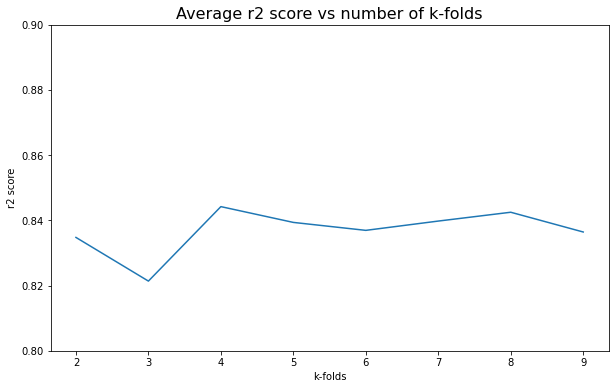

In [30]:
# Hyperparameter tuning for the number of folds
x = np.arange(2, 10)
y = []
for k in x:
    rmse, r2 = train_and_test(selected_features, k)
    y.append(r2)

plt.figure(figsize=(10,6))
plt.plot(x,y)
plt.ylim([0.8, 0.9])
plt.xlabel('k-folds')
plt.ylabel('r2 score')
plt.title('Average r2 score vs number of k-folds', fontsize=16)
plt.show()

## Conclusions

During this project we used linear regression model to perform a prediction of a house price based on its parameters. Following conclusions can be drawn:

* Linear regression model can deal with this task with a good r2 score (around 0.84 using k-fold cross validation).
* The use of all numerical features instead of just 1 increased the accuracy of the model dramatically.
* The correlation of numerical features with a target value did not matter much in this particular case.
* The addition of one-hotted categorical features increased the model's performance.
* Using 4 folds for K fold cross validation yielded the highest accuracy.